# Modelos Lineales
Un modelo lineal es una suma de variables pesadas que predice el valor de salida dado un valor de entrada.

Ej: Predecir el valor del precio de casas.
Dadas algunas características de las casas como: impuestos por año ($X_{tax}$) y edad de la casa en años ($X_{age}$) podemos utilizar esa información para estimar el precio de cada casa. Como ejemplo podemos escribir el siguiente modelo.

$Y_{price} = C_{value} + w_{tax}X_{tax} + w_{age}X_{tax}$

La idea principal es que usando ML podemos ajustar los valores de los pesos $w_i$ y el valor constante para poder predecir valores de casas basados en inputs anteriores.

Este es un claro ejemplo de un modelo de regresion lineal.

### Estructura de un modelo de regresion lineal
De forma general este tipo de modelos tiene como input un conjunto de cracterísticas denominadas $x_i$, $i=0,\dots,n$. Y cada característica se le asocia un peso $w_i$, $i=0,\dots,n$, de modo que el valor de salida sará la suma de los pesos por cada caracteristica mas un valor constante $b$:

$\hat{y} = \sum_i \hat{w}_ix_i + \hat{b}$

Los pesos $\hat{w}_i$ y el intercepto $\hat{b}$ son los parametros a estimar basados en el entrenamiendo del modelo. Una forma de encontrar estos parametros es a través del método de los mínimos cuadrados.
Este método consiste en encontrar el valor que minimice el error medio cuadrado del modelo, es decir, el valor que minimice la suma de las diferencias al cuadrado entre el valor predicho de cada punto $\hat{y}(x_i)$ y el valor real de cada punto $y(x)$, dividido por el número de puntos utilizados en el entrenamiento.

$MSE = \frac{1}{n}\sum_{i=0}^n (\hat{y}(x_i) - y(x))^2$

Los modelos lineales hacen fuertes suposiciones sobre la relación de la variables de entrada y de salida. Pareciera que fueran simplistas, pero en datasets con muchas variables pueden ser muy efectivos y generalizar bien la dinámica de los datos.

### ¿Como son estimados los parámetros del modelo?
Existen varias formas de estimar los parámetros del modelo a partir de los datos de entrenamiento. Esto va a depender de los criterios de fiteo, objetivos y formas de controlar la complejidad del modelo.

### Como implementar la Regresion Lineal
Al igual que en los casos anteriores usamos la clase LinearRegression con los datos ya separados que usaremos para entrenar el modelo.
Una vez entrenado, podemos acceder a los valores de $w_i$ y $b$ con el atributo coef_ y intercept_ respectivamente

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


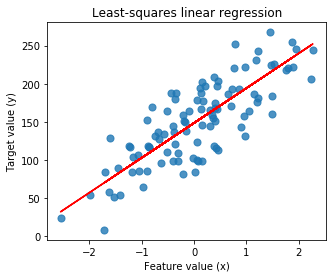

In [3]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
m = linreg.coef_
b = linreg.intercept_
y = m*X_R1 + b
plt.plot(X_R1, y, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Comparación del K-NN Regression vs Least-Squares Linear Regresion

Es interesante comparar los resultados de una regresión lineal aplicando dos modelos distintos de ML al mismo conjunto de datos:
- k-NN Regression
- Least-Squares Lineal Regression

En primer lugar el modelo k-NN no hace muchas suposiciones sobre la estructurta de los datos, por lo que su predicción es potencialmente  precisa pero algunas veces genera predicciones inestable que son muy sensibles a pequeños cambios en los datos de entrenamiento. Esto hace que presente coeficiente de determinación mayor (para el training set) que el caso de regresión lineal.

Por el contrario, modelos lineales asumen muchas suposiciones sobre la estructura de los datos, dando como resultados predicciones mas estables pero a la vez más imprecisas, mostrando un coeficiente de determinación menor (para el training set) que el caso k-NN.

<img src="k-NN_vs_LS_linear.png">

Para este caso particular, es importante resaltar que el modelo de regresion lineal obtuvo un $R^2$ ligeramente más alto que el caso k-NN para los datos de test, debido a que existía una clara relación entre las variables haciendo que estos se ajustaran de mejor forma a la predicción. 


## Otras formas de estimar los parámatros del modelo lineal

### Ridge Regression
Usa el mismo criterio de mínimos cuadrados que el caso anterior, con una pequeña diferencia, agrega una penalización a los parametros $w_i$ que son muy grandes (a esto se le llama regularización). La reguralización es importante en ML dado que previene un sobreajuste (overfit) del modelo, reduciendo la complejidad de este.  

$RSS_{RIDGE}(w,b) = \sum_{i=1}^N (y(x_i) - (w\cdot x_i + b))^2 + \alpha \sum_{j=1}^p w_j^2$

La incorporación de la última parte en la ecuación mostrada hace que modelos con pesos más grandes contribuyan más en la ecuación final. De esta forma, debido a que el objetivo final es minimizar la funcion final, la regularización actua como una penalización ($L_2$) a los pesos que mas contribuyen. Así, en el caso en que tengamos 2 posibles predicciones, se preferirá un modelo donde la suma de los pesos total sea menor. Este efecto no se aprecia en casos con 1 sola característica, sino que en datasets con múltiples caracteristicas, donde la regularización puede incrementar de forma importante la eficiencia del modelo.

La cantidad de regularización que aplicamos está controlada por el parámetro $\alpha$, indicando que valores más altos de $\alpha$ implican mayor regularización y por lo tanto menor complejidad en los modelo con pesos más cercanos a 0.

#### Implementación de modelo de Regresión Ridge
Primero cargamos el dataframe con los datos de crimenes.

In [21]:
from adspy_shared_utilities import load_crime_dataset
crime = pd.read_table('/home/felipe/Documents/Programas/git_repository/Applied_Machine_Learning_in_python/2nd_week/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.ix[:,columns_to_keep].dropna()
X_crime = crime.ix[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

Usando la clase Ridge y pasando la información del parametro $\alpha$ podemos inmediatamente entrenar el modelo con la cunción fit.

In [41]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('ridge intercept: {:.2f}, linear intercept: {:.2f}'
     .format(linridge.intercept_,linreg.intercept_))
print('R-squared score (training): ridge: {:.3f},  linear: {:.3f}'
     .format(linridge.score(X_train, y_train),linreg.score(X_train, y_train)))
print('R-squared score (test): ridge: {:.3f},  linear: {:.3f}'
     .format(linridge.score(X_test, y_test),linreg.score(X_test, y_test)))

Crime dataset
ridge intercept: -3352.42, linear intercept: 3861.71
R-squared score (training): ridge: 0.671,  linear: 0.668
R-squared score (test): ridge: 0.494,  linear: 0.520


Si comparamos el resultado de Ridge con el modelo de regresion lineal simple podemos ver que no hay mayor diferencia en los valores de $R^2$. Sin embargo, podemos realizar algunos cambios a modelo Ridge para mejorar los resultados. Lo que podemos hacer es normalizar las escalas de los pesos de cada característica que originalmente presentaban distintas escalas. Existen varias formas de normalizar los pesos, pero en esta oportunidad utilizaremos un tipo llamado reescalamiento MinMax, haciendo que todas las características estén evaluadas entre 0 y 1:
- A cada caracteristica $x_i$ calcularemos el valor mínimo y máximo y transformaremos de $x_i$ a $x'_i$ de la siguiente forma:

$x'_i = \frac{x_i - x_i^{min}}{x_i^{max} - x_i^{min}}$

Para esto debemos:
- importar MinMaxScaler 
- preparar el objeto escalar para su uso usando scaler.fit(X_train)
- aplicamos el reescalamiento con scaler.transform()
- Podemos ser un poco mas eficientes aplicando al mismo el fit y la transformación al training set con el comando scaler.fit_transform(X_train)

Algunos consejos a la hora de realizar la normalizacon:
- fitear el scaler usando el trainig set y luego aplicar el mnismo scaler al train set.
- No escalar el training y test set usando diferentes scalers: esto causaría un sesgo en los datos.
- No fit el scaler con el test set.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
#Aplicamos el reescalamiento a X_train y X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge_scaled = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge scaled intercept: {:.2f}, linear intercept: {:.2f}'
     .format(linridge_scaled.intercept_,linreg.intercept_))
print('R-squared score (training): ridge scaled: {:.3f},  linear: {:.3f}'
     .format(linridge_scaled.score(X_train_scaled, y_train),linreg.score(X_train, y_train)))
print('R-squared score (test): ridge scaled: {:.3f},  linear: {:.3f}'
     .format(linridge_scaled.score(X_test_scaled, y_test),linreg.score(X_test, y_test)))
eff = 100*(linridge_scaled.score(X_test_scaled, y_test)- linridge.score(X_test, y_test))/linridge.score(X_test, y_test)
print('Improvement of {:.2f}% in the test set prediction'.format(eff))


Crime dataset
ridge scaled intercept: 933.39, linear intercept: 3861.71
R-squared score (training): ridge scaled: 0.615,  linear: 0.668
R-squared score (test): ridge scaled: 0.599,  linear: 0.520
Improvement of 21.16% in the test set prediction


#### ¿Que ocurre si variamos $\alpha$ en el modelo Ridge?
El mejor $R^2$ en el test set resulta ser cuando usamos $\alpha=20$

In [51]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 87, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



### Lasso Regression
Al igual que el metodo de Ridge, Lasso también agrega un factor de penalización ($L_1$) a los pesos, pero esta vez usa el valor absoluto del peso en vez del peso al cuadrado

$RSS_{LASSO}(w,b) = \sum_{i=1}^N (y(x_i) - (w\cdot x_i + b))^2 + \alpha \sum_{j=1}^p |w_j|$

El efecto de esta forma de regularización es hacer que los pesos de los parametros que menos contribuyen sean 0, dejando con un valor distinto de 0 a los pesos más influyentes. Esta forma de regularización también esta controlada por el parámetro $\alpha$.

Basados en la forma en como se regularizan las regresiones lineales, ya sea usando Ridge ($L_2$) o Lasso ($L_1$), podemos distinguir en que casos usar una o la otra forma:
- Cuando tenemos muchas características ($x_i$) con efectos pequeños o medianos usamos Ridge
- Cuando tenemos pocas caractetísticas ($x_i$) con efectos medianos o largos usamos Lasso

Para implementar la regresión Lasso debemos importar la clase Lasso.
En algunos casos, aparecerá en pantalla una advertencia de convergencia. Para evitar eso debemos incorporar la variable max_iter con un valor grande, frecuentemente se usa por lo menos 20000 o más. Esto aumentará el tiempo de iteración.
Usando el dataset de los crimenes podemos ver que solo algunos pesos han quedado con valores distintos de 0

In [52]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985793
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

Usando el modelo de regresión de Lasso nos ayuda a ver cuales son las variables que más influencia tienen entre los datos de entrada y salida. 

#### ¿Que ocurre si variamos  𝛼  en el modelo Lasso?
Usando un valor de $\alpha=3$ obtenemos el mejor indicador $R^2$ en el test dataset.

In [54]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



### Polinomial Regression
Supongamos por un momento que tenemos un conjunto de datos 2 dimensionales ($x_0, x_1$). Podríamos agregas mas información que involucre la multiplicación de todas las combinaciones de caracteristicas entre si terminando con un dataset de 5 dimensiones: ($x_0$, $x_1$, $x_0^2$, $x_0x_1$, $x_1^2$).

$ x = (x_0,x_1) \quad \rightarrow \quad x'=(x_0,x_1,x_0^2,x_0x_1,x_1^2)$

Ahora podríamos considerar el problema de predecir la misma regresión lineal pero esta vez usando 5 características en vez de las 2 originales. El punto importante aquí es que este aun es un problema de regresión lineal por lo que usamos la misma técnica usada antes

$\hat{y} = \hat{w}_0x_0 + \hat{w}_1x_1 + \hat{w}_{00}x_0^2 + \hat{w}_{01}x_0x_1 + \hat{w}_{11}x_1^2 = \sum_i\hat{w}_ix_i + \sum_{i,j} \hat{w}_{i,j}x_ix_j$

Este tipo problema se llama regresión polinomial, donde el número inicial de dimensiones del dataset da el orden del polinomio con el cual vamos a trabajar. En este caso es un polinomio de orden 2.

#### Caracteristicas de una regresion lineal polinomial
- Nos permite capturar interacciones entre las caracteristicas originales agragandolas como nuevas interacciones al modelo lineal
- Para hacer un problema de clasificacion más fácil.
- Podemos aplicar transformaciones no lienales para crear nuevas caracteristicas a analizar.

Un efecto adverso de aplicar este tipo de regresiones es que genera modelos más complejos que pueden ser sobreajustados}, por lo tanto para aminorar este efecto es que generalmente van a compañados con una ragularización al igual que los modelos de regresión Ridge.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_friedman1

X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

[ 7.73562365  9.63063021  8.54132022 21.21811721 10.91627127  6.09081028
 18.41621638  9.65292317 18.25188238 12.14032442 12.07187785  6.68579564
 22.08810712 14.88671165 12.57816757 15.10918004  8.22218446 20.24695243
 11.55748746 17.41823211 15.87877067 22.78057004  9.18985112 18.50675171
 22.39511633 16.33444873  4.33057892 17.2134918  11.30742883 11.61715968
  8.59450992  9.27443963 12.36412887 25.28585219 19.0688687  24.20228984
 19.35369672 13.05039828 11.72234556 16.73585851 17.76490158 12.87001621
 15.22742039  7.13070042 20.21185351 14.26511075 12.94711274 11.42031629
  9.55877354 19.44357164 10.23527752 21.63246599 19.1405913  12.61974534
  9.46153769 13.274062   10.19963427 20.46488539  9.63399887 23.88924514
 20.4618788   3.03696073  8.38020792 21.36781617 14.86941989 15.93572235
 16.59336007 19.62413769 19.71092748  9.89245745 13.59296032 18.25888161
 15.7675116   7.86400356  3.59181766]
linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -